In [ ]:
import pandas as pd

file_path = 'sample_data/credit-1.csv'
df = pd.read_csv(file_path)

print(f"Successfully loaded {file_path}. First 5 rows:")
print(df.head())

Successfully loaded sample_data/credit-1.csv. First 5 rows:
  checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit hous

In [ ]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Separate features (X) and target (y)
X = df.drop('default', axis=1)
y = df['default']

# Convert categorical features into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=2,random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.4f}")

Decision Tree Classifier Accuracy: 0.7100


In [10]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


Decision tree visualization saved as decision_tree.png
You can also view the graph directly within the notebook:


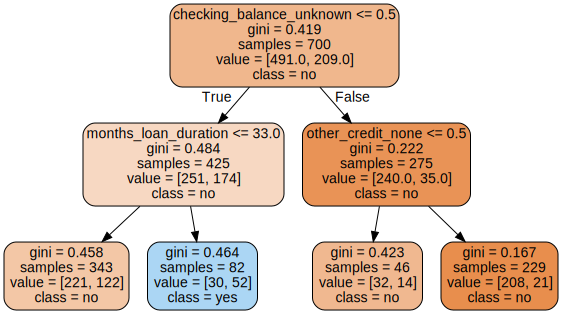

In [9]:
from sklearn.tree import export_graphviz
import graphviz

# Get feature names after one-hot encoding
feature_names = X.columns.tolist()

# Get class names for the target variable 'default'
class_names = decision_tree.classes_

# Export the decision tree to a DOT file
dot_data = export_graphviz(decision_tree, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True)

# Render the DOT file to a PNG image using graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True, view=False)

print("Decision tree visualization saved as decision_tree.png")
print("You can also view the graph directly within the notebook:")
display(graph)

In [12]:
from sklearn.metrics import precision_score, recall_score

# Calculate Precision
precision = precision_score(y_test, y_pred, pos_label='yes')

# Calculate Recall
recall = recall_score(y_test, y_pred, pos_label='yes')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.5625
Recall: 0.1978


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

for depth in range(2, 8): # Iterate from max_depth = 2 to 7
    print(f"\nTraining Decision Tree with max_depth = {depth}")

    # Initialize the Decision Tree Classifier with the current max_depth
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the model
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_depth = decision_tree.predict(X_test)

    # Calculate Precision
    precision_depth = precision_score(y_test, y_pred_depth, pos_label='yes')

    # Calculate Recall
    recall_depth = recall_score(y_test, y_pred_depth, pos_label='yes')

    print(f"  Precision: {precision_depth:.4f}")
    print(f"  Recall: {recall_depth:.4f}")


Training Decision Tree with max_depth = 2
  Precision: 0.5625
  Recall: 0.1978

Training Decision Tree with max_depth = 3
  Precision: 0.6061
  Recall: 0.2198

Training Decision Tree with max_depth = 4
  Precision: 0.5106
  Recall: 0.2637

Training Decision Tree with max_depth = 5
  Precision: 0.5116
  Recall: 0.2418

Training Decision Tree with max_depth = 6
  Precision: 0.4578
  Recall: 0.4176

Training Decision Tree with max_depth = 7
  Precision: 0.5088
  Recall: 0.3187


In [14]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Train a Decision Tree Classifier with max_depth=6
decision_tree_depth_6 = DecisionTreeClassifier(max_depth=6, random_state=42)
decision_tree_depth_6.fit(X_train, y_train)

# Get feature importances
feature_importances = decision_tree_depth_6.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances for Decision Tree with max_depth=6:")
print(importance_df)


Feature Importances for Decision Tree with max_depth=6:
                            Feature  Importance
9          checking_balance_unknown    0.223850
4                               age    0.154924
0              months_loan_duration    0.130033
1                            amount    0.122692
20         savings_balance_< 100 DM    0.056145
26   employment_duration_unemployed    0.051837
11           credit_history_perfect    0.039219
3                years_at_residence    0.038775
10              credit_history_good    0.029779
27                other_credit_none    0.029173
17     purpose_furniture/appliances    0.028457
29                      housing_own    0.024184
31                      job_skilled    0.019650
21        savings_balance_> 1000 DM    0.015984
2                 percent_of_income    0.013229
8         checking_balance_> 200 DM    0.013087
30                     housing_rent    0.008983
7           checking_balance_< 0 DM    0.000000
5              existing_loans_co

In [15]:
# Get the top 10 features from the importance_df
top_10_features = importance_df.head(10)['Feature'].tolist()

# Filter X_train and X_test to include only these top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

print("Top 10 features selected:")
print(top_10_features)

# Initialize and train a new Decision Tree Classifier with max_depth=6 using top 10 features
decision_tree_top10 = DecisionTreeClassifier(max_depth=6, random_state=42)
decision_tree_top10.fit(X_train_top10, y_train)

print("\nDecision Tree trained with top 10 features.")


Top 10 features selected:
['checking_balance_unknown', 'age', 'months_loan_duration', 'amount', 'savings_balance_< 100 DM', 'employment_duration_unemployed', 'credit_history_perfect', 'years_at_residence', 'credit_history_good', 'other_credit_none']

Decision Tree trained with top 10 features.


Decision tree with top 10 features visualization saved as decision_tree_top10_features.png
You can also view the graph directly within the notebook:


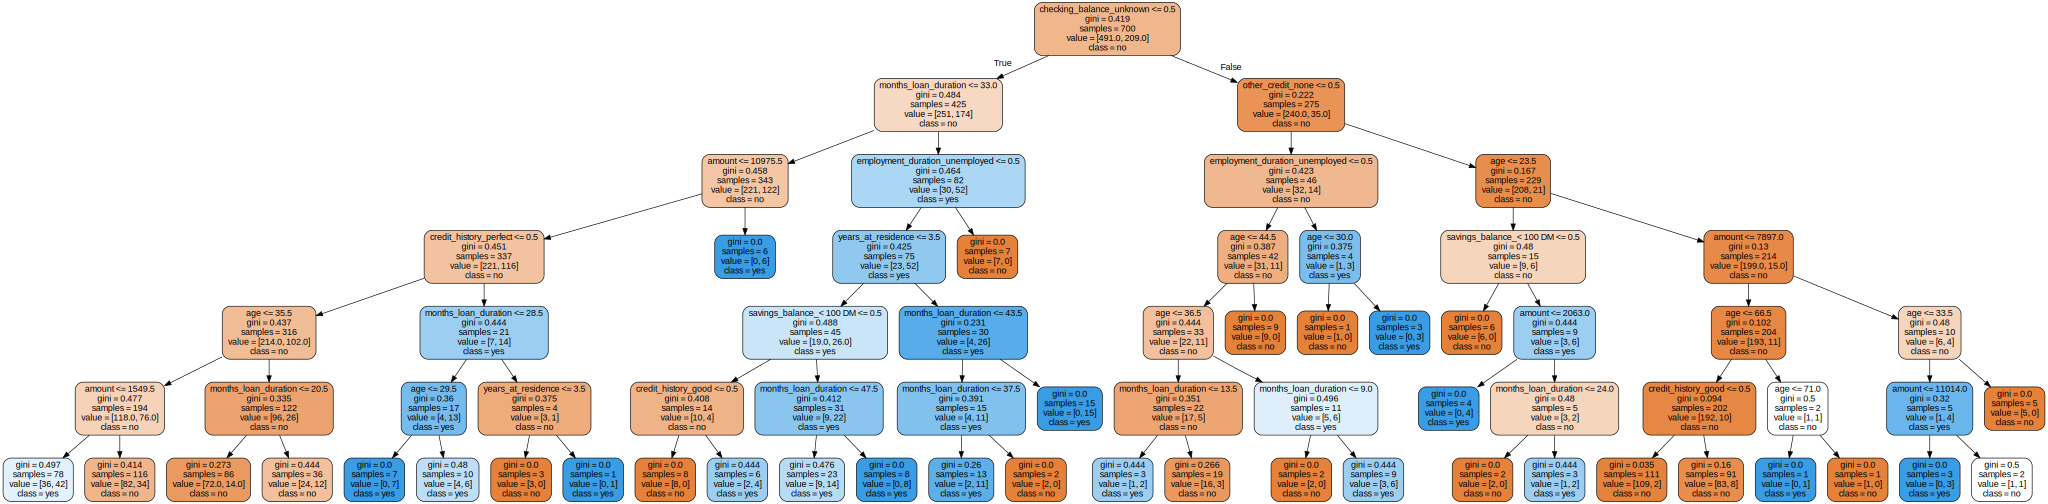

In [16]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Get feature names for the new model
feature_names_top10 = X_train_top10.columns.tolist()

# Get class names for the target variable 'default'
class_names = decision_tree_top10.classes_

# Export the decision tree to a DOT file
dot_data_top10 = export_graphviz(decision_tree_top10, out_file=None,
                           feature_names=feature_names_top10,
                           class_names=class_names,
                           filled=True, rounded=True)

# Render the DOT file to a PNG image using graphviz
graph_top10 = graphviz.Source(dot_data_top10)
graph_top10.render("decision_tree_top10_features", format="png", cleanup=True, view=False)

print("Decision tree with top 10 features visualization saved as decision_tree_top10_features.png")
print("You can also view the graph directly within the notebook:")
display(graph_top10)
